In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [2]:
 #Import the dataset
 iris=pd.read_csv('/kaggle/input/iris-dataset/iris.csv')
 # Checking the dataset
 iris.head()
 x=iris[["sepal_length","sepal_width","petal_length","petal_width"]]
 y=iris["species"]
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 from sklearn.svm import SVC
 model=SVC()
 model.fit(x_train,y_train)
 pred=model.predict(x_test)
 # Importing the classification report and confusion matrix
 from sklearn.metrics import classification_report, confusion_matrix
 print(classification_report(y_test, pred))
 print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]


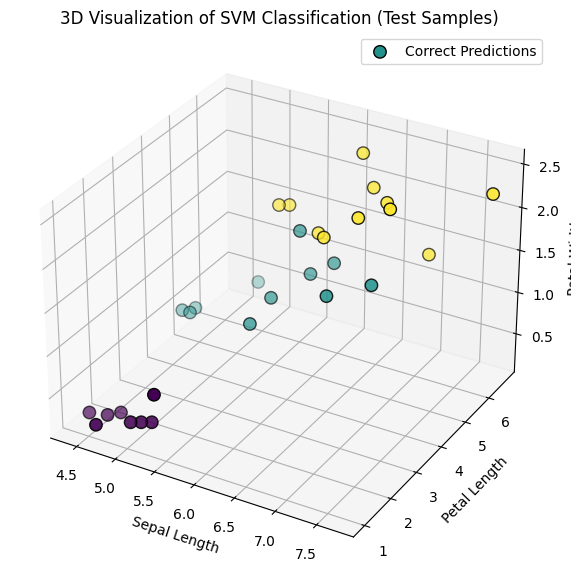

In [3]:
# -------------------------------
# CONTINUATION OF YOUR CODE BELOW
# -------------------------------

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

# Encode labels (needed for colors and plotting)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_test_enc = le.transform(y_test)
pred_enc = le.transform(pred)

# Select 3 features for 3D visualization
X_test_np = x_test[["sepal_length","petal_length","petal_width"]].values

# Create 3D Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Correct predictions = circles
correct_idx = np.where(y_test_enc == pred_enc)[0]
ax.scatter(
    X_test_np[correct_idx, 0],
    X_test_np[correct_idx, 1],
    X_test_np[correct_idx, 2],
    c = y_test_enc[correct_idx],
    marker='o',
    s=80,
    edgecolors='k',
    label='Correct Predictions'
)

# Wrong predictions = X markers
wrong_idx = np.where(y_test_enc != pred_enc)[0]
if len(wrong_idx) > 0:
    ax.scatter(
        X_test_np[wrong_idx, 0],
        X_test_np[wrong_idx, 1],
        X_test_np[wrong_idx, 2],
        c = y_test_enc[wrong_idx],
        marker='X',
        s=120,
        edgecolors='k',
        label='Misclassified'
    )

# Labels
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal Width")
ax.set_title("3D Visualization of SVM Classification (Test Samples)")

ax.legend()
plt.show()


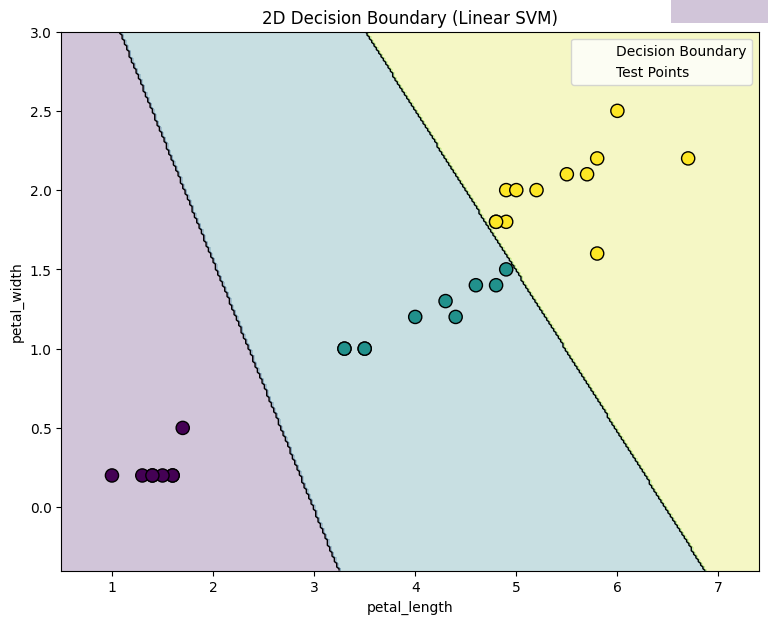

In [4]:
# -----------------------------------
# 2D Decision Boundary (Add Underneath)
# -----------------------------------

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Choose 2 features for the 2D plot
f1 = "petal_length"
f2 = "petal_width"

X_plot = x[[f1, f2]].values
X_train_2D = x_train[[f1, f2]].values
X_test_2D = x_test[[f1, f2]].values

# Encode labels (for coloring points correctly)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train a linear SVM on 2 features
model_2d = SVC(kernel='linear')
model_2d.fit(X_train_2D, y_train_enc)

# Mesh grid for plotting
x_min, x_max = X_plot[:,0].min() - 0.5, X_plot[:,0].max() + 0.5
y_min, y_max = X_plot[:,1].min() - 0.5, X_plot[:,1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict grid
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.25)

# Decision boundaries (straight lines)
plt.contour(xx, yy, Z, levels=[0,1,2], colors='k', linewidths=1)

# Plot test samples
plt.scatter(X_test_2D[:,0], X_test_2D[:,1],
            c=y_test_enc, s=90, edgecolors='k')

plt.xlabel(f1)
plt.ylabel(f2)
plt.title("2D Decision Boundary (Linear SVM)")
plt.legend(["Decision Boundary", "Test Points"])
plt.show()
